# F20DL Lab 5

## Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a pandas dataframe
ds = pd.read_csv("./datasets/Dry_Bean_Dataset.csv")

In [3]:
data = ds[ds.columns.difference(["Class"])]    # Original dataset without 'Class' attribute
target = ds["Class"]

## Classifiers

### Multinomial Naive Bayes

In [4]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=5, strategy = "quantile", encode = "ordinal")
dmnb = disc.fit_transform(data)

In [5]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(dmnb, target, random_state=6)    # Original

In [6]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=1.0, class_prior=None)
classifier.fit(data_train, target_train)
prediction = classifier.predict(data_test)
classifier.score(data_test, target_test)   # Original dataset

0.8527769615045548

### Gaussian Naive Bayes

from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=5, strategy = "uniform", encode = "ordinal")
dmnb = disc.fit_transform(data)

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(dmnb, target, random_state=6)    # Original

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
prediction = classifier.fit(data_train, target_train).predict(data_test)

#(total number of points, number of mislabled points)
(data_test.shape[0], (target_test != prediction).sum())

### Complement Naive Bayes

from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=3, strategy = "uniform", encode = "ordinal")
dmnb = disc.fit_transform(data)

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(dmnb, target, random_state=6)    # Original

from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import ComplementNB

classifier = ComplementNB()
classifier.fit(data_train, target_train)

prediction = classifier.predict(data_test)

print(f"Test Set Accuracy : {accuracy_score(target_test, prediction) * 100} % \n\n")
print(f"Classifier Report : \n\n {classification_report(target_test, prediction)}")

### Bernoulli Naive Bayes

from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins=2, strategy="quantile", encode="ordinal")
bnb_data = disc.fit_transform(data)
bnb_data

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(bnb_data, target, random_state=6)

from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB()
classifier.fit(data_train, target_train)
prediction = classifier.predict(data_test)
classifier.score(data_test, target_test)

### Categorical Naive Bayes

Categorical Naive Bayes is a classifer for discrete categorical features. The features in our dataset, however, are mostly continuous. Therefore, to use CategoricalNB (the scikit-learn implementation of Categorical Naive Bayes) we must first place all of our continuous values into categories.

from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=3, strategy = "uniform", encode = "ordinal")
dmnb = disc.fit_transform(data)

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(dmnb, target, random_state=6)    # Original

Fitting our newly-categorised features and the corresponding labels to a CategoricalNB model gives us a model with a score of 77.8%.

from sklearn.naive_bayes import CategoricalNB

classifier = CategoricalNB()
classifier.fit(data_train, target_train)
print(classifier.score(data_test, target_test))

prediction = classifier.predict(data_test)

## Metrics

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, prediction)

0.8527769615045548

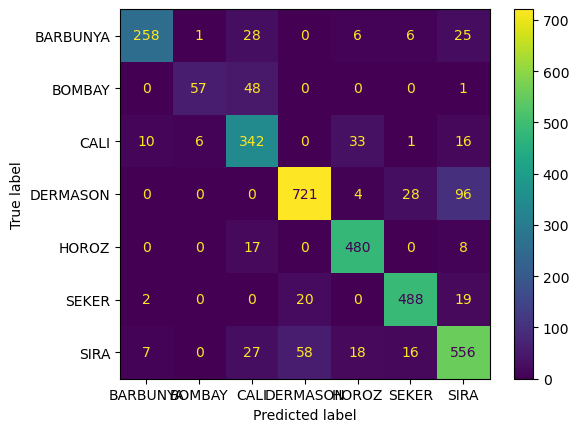

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(target_test, prediction, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [9]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# For SIRA
fp = FP[6]
fn = FN[6]
tp = TP[6]
tn = TN[6]

# True positive rate
siraTPR = tp/(tp+fn)
# False positive rate
siraFPR = fp/(fp+tn)

# Accuracy for SIRA

(siraTPR, siraFPR)

(0.8152492668621701, 0.06063947078280044)

In [10]:
# For SEKER
fpSek = FP[5]
fnSek = FN[5]
tpSek = TP[5]
tnSek = TN[5]

# True positive rate
sekerTPR = tpSek/(tpSek+fnSek)
# False positive rate
sekerFPR = fpSek/(fpSek+tnSek)

(sekerTPR, sekerFPR)

(0.9224952741020794, 0.017745302713987474)

In [11]:
# For HOROZ
fpHor = FP[4]
fnHor = FN[4]
tpHor = TP[4]
tnHor = TN[4]

# True positive rate
horozTPR = tpHor/(tpHor+fnHor)
# False positive rate
horozFPR = fpHor/(fpHor+tnHor)

(horozTPR, horozFPR)

(0.9504950495049505, 0.021048999309868876)

In [12]:
# For DERMASON
fpDer = FP[3]
fnDer = FN[3]
tpDer = TP[3]
tnDer = TN[3]

# True positive rate
dermasonTPR = tpDer/(tpDer+fnDer)
# False positive rate
dermasonFPR = fpDer/(fpDer+tnDer)

(dermasonTPR, dermasonFPR)

(0.8492343934040048, 0.030540328895849646)

In [13]:
# For CALI
fpCal = FP[2]
fnCal = FN[2]
tpCal = TP[2]
tnCal = TN[2]

# True positive rate
caliTPR = tpCal/(tpCal+fnCal)
# False positive rate
caliFPR = fpCal/(fpCal+tnCal)

(caliTPR, caliFPR)

(0.8382352941176471, 0.04006677796327212)

In [14]:
# For BOMBAY
fpBom = FP[1]
fnBom = FN[1]
tpBom = TP[1]
tnBom = TN[1]

# True positive rate
bombayTPR = tpBom/(tpBom+fnBom)
# False positive rate
bombayFPR = fpBom/(fpBom+tnBom)

(bombayTPR, bombayFPR)

(0.5377358490566038, 0.0021231422505307855)

In [15]:
# For BARBUNYA
fpBar = FP[0]
fnBar = FN[0]
tpBar = TP[0]
tnBar = TN[0]

# True positive rate
barbunyaTPR = tpBar/(tpBar+fnBar)
# False positive rate
barbunyaFPR = fpBar/(fpBar+tnBar)

(barbunyaTPR, barbunyaFPR)

(0.7962962962962963, 0.006170834686586554)

In [16]:
#Lab 4 part 3

#Precision
precision = tp/(tp+fp)

#Recall
recall = tp/(tp+fn)

#F-measure
Fmeasure = (2 * recall * precision) / (recall + precision)

#Display
(precision, recall, Fmeasure)

(0.7711511789181692, 0.8152492668621701, 0.7925873129009267)

## ROC Curve

In [17]:
# Convert target class to be true for bean type "SIRA" and false otherwise
target_train_sira = (target_train == "SIRA")
target_test_sira = (target_test == "SIRA")

In [18]:
from sklearn.model_selection import cross_val_predict

target_score = cross_val_predict(classifier, data_train, target_train_sira, cv=5, method="predict_proba")
target_score = target_score[:,1]
target_score

array([0.12212472, 0.11247768, 0.26804328, ..., 0.23023276, 0.1643748 ,
       0.07788512])

In [19]:
from sklearn.metrics import roc_curve

# Get fpr and tpr values for roc curve
fpr, tpr, threshold = roc_curve(target_train_sira, target_score)

In [20]:
from sklearn.metrics import roc_auc_score

# Calculate area under roc curve
roc_area = roc_auc_score(target_train_sira, target_score)

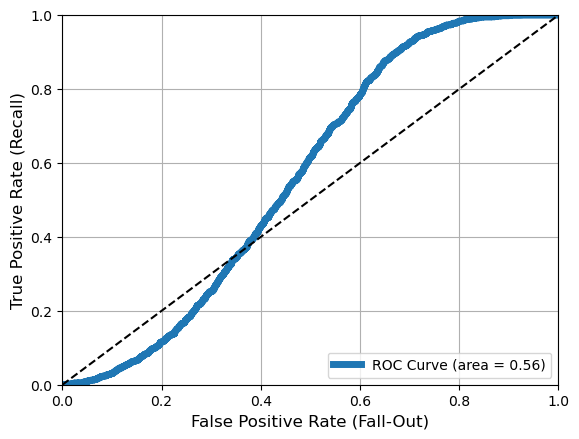

In [21]:
# Plot roc curve
plt.figure()
plt.plot(fpr, tpr, linewidth=5, label="ROC Curve (area = {:.2f})".format(roc_area))
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.axis([0, 1, 0, 1])                                    # Not shown in the book
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=12)    # Not shown
plt.grid(True)                                            # Not shown
plt.legend(loc="lower right")
plt.show()